In [1]:
%matplotlib inline

import numpy as np
import random as r
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable

# Perceptron

In [2]:
class Perceptron:
    __slots__ = 'bias', 'weights', 'output', 'inputs'
    
    def __init__(self, size):
        self.bias = r.random()
        self.weights = np.random.randn(size)
        self.output = None
        self.inputs = None
        
    def propagation(self, inputs):
        self.output = 1 * ((self.weights.dot(inputs) + self.bias) > 0)
        self.inputs = inputs
        
    def update(self, lr, output):
        error = output - self.output 
        if error:
            self.weights = np.array([w + lr * error * x \
                                    for x, w in np.column_stack((self.inputs, self.weights))])
            self.bias = self.bias + lr * error
            
    def data(self):
        return [self.bias, self.weights, self.inputs, self.output]

In [3]:
table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [4]:
def data(epoch, data, output_correct):
    data.insert(0, epoch + 1)
    data.insert(4, output_correct)
    return data

In [5]:
def simulation(epochs, dataset, perceptron, table):
    weights_log = [perceptron.weights]
    bias_log = [perceptron.bias]
    
    for epoch in range(epochs):
        for i in range(len(dataset)):
            perceptron.propagation(dataset[i, 0:3])
            table.rows.append(data(epoch, perceptron.data(), dataset[i, 3]))
            perceptron.update(lr=0.5, output=dataset[i, 3])
        weights_log = np.concatenate((weights_log, [perceptron.weights]), axis=0)
        bias_log.append(perceptron.bias)
            
    return weights_log, bias_log

In [6]:
def plot(log, title):
    plt.plot(log[0][:, 0])
    plt.plot(log[0][:, 1])
    plt.plot(log[0][:, 2])
    plt.plot(log[1])
    plt.title(title)
    plt.xlabel('epochs')
    plt.legend(['Weight 1', 'Weight 2', 'Weight 3', 'Bias'], loc='upper left')
    plt.show()

## Caso Conjunción

In [7]:
conjunction = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,0]
])

p_conjunction = Perceptron(3)

In [8]:
conjunction_log = simulation(30, conjunction, p_conjunction, table)

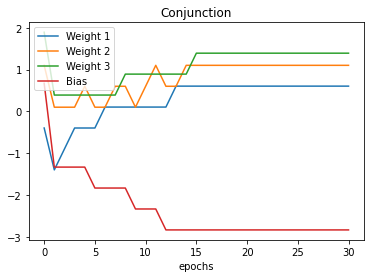

In [9]:
plot(conjunction_log, "Conjunction")

In [10]:
print(table)

+-------+--------+----------------------------+---------+------------+---------+
| epoch |  bias  |          weights           | inputs  | outputs co | outputs |
|       |        |                            |         |   rrect    |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.671  | [-0.39515148  1.10162631   | [1 1 1] |     1      |    1    |
|       |        |        1.89168863]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.671  | [-0.39515148  1.10162631   | [1 1 0] |     0      |    1    |
|       |        |        1.89168863]         |         |            |         |
+-------+--------+----------------------------+---------+------------+---------+
|   1   | 0.171  | [-0.89515148  0.60162631   | [1 0 1] |     0      |    1    |
|       |        |        1.89168863]         |         |            |         |
+-------+--------+----------

## Caso Disyunción

In [11]:
disjunction = np.array([
    [1,1,1,1],
    [1,1,0,1],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,0]
])

p_disjunction = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [12]:
simulation(30, disjunction, p_disjunction, table)

(array([[-2.10082093, -1.83269496,  0.20675972],
        [-1.10082093, -0.83269496,  0.70675972],
        [-0.60082093, -0.33269496,  0.70675972],
        [-0.60082093, -0.33269496,  0.70675972],
        [-0.10082093,  0.16730504,  0.70675972],
        [-0.10082093,  0.16730504,  0.70675972],
        [-0.10082093,  0.16730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907,  0.66730504,  0.70675972],
        [ 0.39917907

In [13]:
print(table)

+-------+------+-----------------------------+---------+-------------+---------+
| epoch | bias |           weights           | inputs  | outputs cor | outputs |
|       |      |                             |         |    rect     |         |
+-------+------+-----------------------------+---------+-------------+---------+
|   1   | 0.8  | [-2.10082093 -1.83269496  0 | [1 1 1] |      1      |    0    |
|       |      |         .20675972]          |         |             |         |
+-------+------+-----------------------------+---------+-------------+---------+
|   1   | 1.3  | [-1.60082093 -1.33269496  0 | [1 1 0] |      1      |    0    |
|       |      |         .70675972]          |         |             |         |
+-------+------+-----------------------------+---------+-------------+---------+
|   1   | 1.8  | [-1.10082093 -0.83269496  0 | [1 0 1] |      1      |    1    |
|       |      |         .70675972]          |         |             |         |
+-------+------+------------

## Bicondicionalidad

In [14]:
biconditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

p_biconditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [15]:
simulation(100, biconditionality, p_biconditionality, table)

(array([[ 1.08627776e+00,  1.51181647e+00,  1.49924524e+00],
        [-4.13722241e-01,  5.11816469e-01,  4.99245239e-01],
        [-4.13722241e-01,  1.18164689e-02, -7.54761294e-04],
        [-4.13722241e-01,  1.18164689e-02,  4.99245239e-01],
        [-9.13722241e-01,  1.18164689e-02, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01, -4.88183531e-01, -7.54761294e-04],
        [-9.13722241e-01

In [16]:
print(table)

+-------+--------+------------------------------+---------+----------+---------+
| epoch |  bias  |           weights            | inputs  | outputs  | outputs |
|       |        |                              |         | correct  |         |
+-------+--------+------------------------------+---------+----------+---------+
|   1   | 0.965  | [1.08627776 1.51181647 1.499 | [1 1 1] |    1     |    1    |
|       |        |            24524]            |         |          |         |
+-------+--------+------------------------------+---------+----------+---------+
|   1   | 0.965  | [1.08627776 1.51181647 1.499 | [1 1 0] |    0     |    1    |
|       |        |            24524]            |         |          |         |
+-------+--------+------------------------------+---------+----------+---------+
|   1   | 0.465  | [0.58627776 1.01181647 1.499 | [1 0 1] |    0     |    1    |
|       |        |            24524]            |         |          |         |
+-------+--------+----------

## Condicionalidad

In [17]:
conditionality = np.array([
    [1,1,1,1],
    [1,1,0,0],
    [1,0,1,1],
    [1,0,0,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,1,1],
    [0,0,0,1]
])

p_conditionality = Perceptron(3)

table = BeautifulTable()
table.columns.header = ["epoch", "bias", "weights", "inputs", "outputs correct", "outputs"]

In [18]:
simulation(30, conditionality, p_conditionality, table)

(array([[ 0.61488068, -0.66284759, -0.90226189],
        [ 0.61488068, -0.66284759,  0.09773811],
        [ 0.11488068, -0.66284759,  0.59773811],
        [-0.38511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932, -0.66284759,  0.59773811],
        [-0.88511932

In [19]:
print(table)

+-------+-------+-----------------------------+---------+------------+---------+
| epoch | bias  |           weights           | inputs  | outputs co | outputs |
|       |       |                             |         |   rrect    |         |
+-------+-------+-----------------------------+---------+------------+---------+
|   1   | 0.975 | [ 0.61488068 -0.66284759 -0 | [1 1 1] |     1      |    1    |
|       |       |         .90226189]          |         |            |         |
+-------+-------+-----------------------------+---------+------------+---------+
|   1   | 0.975 | [ 0.61488068 -0.66284759 -0 | [1 1 0] |     0      |    1    |
|       |       |         .90226189]          |         |            |         |
+-------+-------+-----------------------------+---------+------------+---------+
|   1   | 0.475 | [ 0.11488068 -1.16284759 -0 | [1 0 1] |     1      |    0    |
|       |       |         .90226189]          |         |            |         |
+-------+-------+-----------